In [18]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


### 표본상관계수

#### 연습문제 7.5.1
- 꽃받침의 길이와 꽃받침의 폭 사이의 상관계수
- 꽆잎의 길이와 꽆잎의 폭사이의 상관계수
- 꽃받침의 폭과 꽆잎의 폭 사이의 상관계수

In [4]:
import scipy as sp
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭

In [5]:
sp.stats.pearsonr(x1, x3)[0]

0.8717537758865832

In [6]:
sp.stats.pearsonr(x1, x4)[0]

0.8179411262715757

In [7]:
sp.stats.pearsonr(x2, x4)[0]

-0.3661259325364391

## 8,1 사이파이를 이용한 확률분포 분석

#### 확률밀도 함수

In [32]:
rv = sp.stats.norm(loc=1, scale=2)  #기대값이 1이고 표준편차가 2인 정규분포

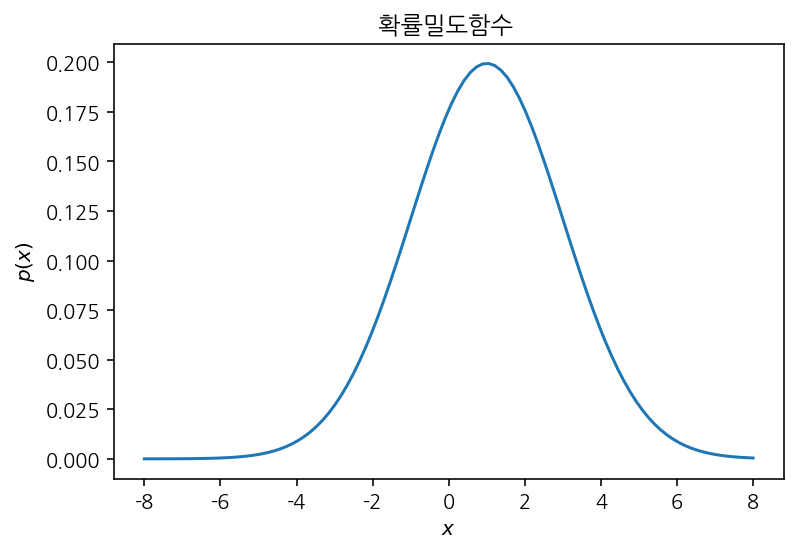

In [33]:
import matplotlib.pyplot as plt

xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

#### 연습문제 8.1.1
- 기댓값이 0이고 표준 편차가 0.1인 정규분포의 객체를 만들고 확률밀도함수를 그려라.
- 이 확률밀도함수의 최대값은 얼마인가?

In [21]:
rv = sp.stats.norm(loc = 0, scale=0.1) # 기댓값이 0이고 표준편차가 0.1

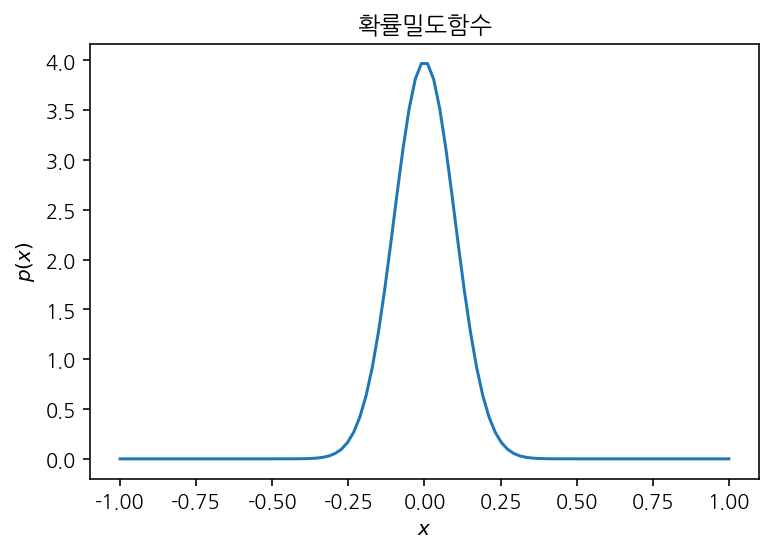

In [29]:
xx2 = np.linspace(-1, 1, 100)
pdf2 = rv.pdf(xx2)
plt.plot(xx2, pdf2)
plt.title("확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [30]:
rv.pdf(0)  #0에서 최댓값을 가진다.

3.989422804014327

In [ ]:
# pdf의 높이는 확률이 아니다. cdf의 기울기를 나타냄.

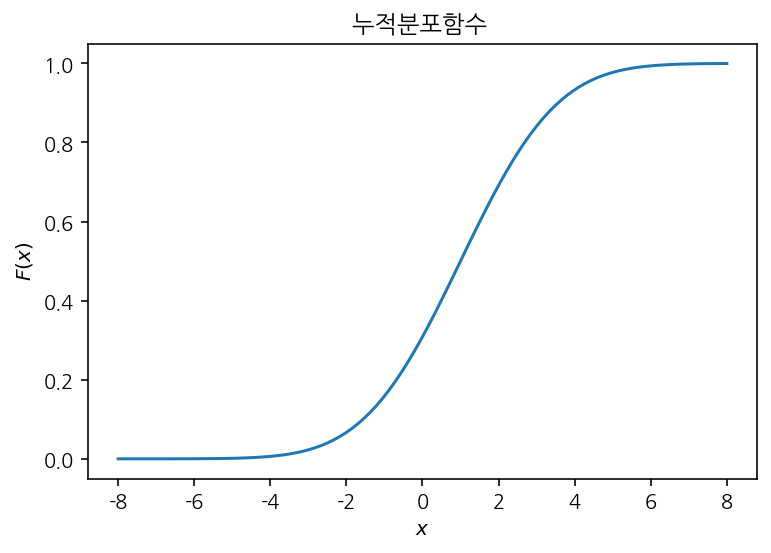

In [34]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()


In [ ]:
# cdf의 높이는 확률 자체를 나타냄.

#### 변한 확률변수의 시뮬레이션

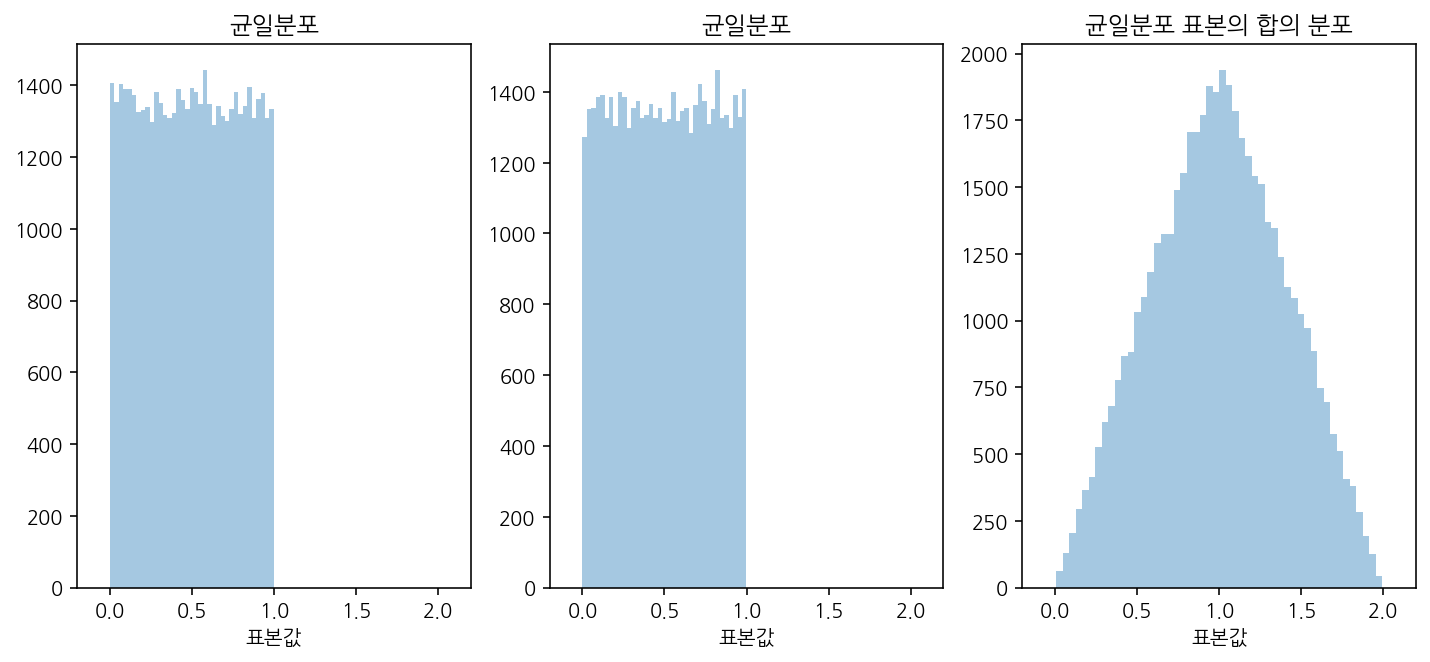

In [41]:
import seaborn as sns

rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12,5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()

#### 연습문제 8.1.3
- 균일분포 확률분포에서 두 개가 아닌 10개 표본값을 생성하여 그 값의 합을 구하면 어떤 모양의 분포를 이루는지 시뮬레이션 기능을 사용하여 구하라. 이 때 시뮬레이션은 1000번 반복한다.

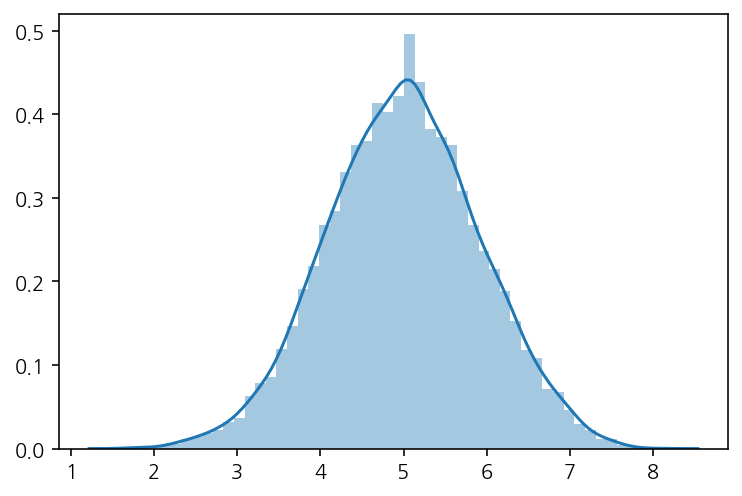

In [47]:
# 10개 생성을 10000번 반복
x = sp.stats.uniform().rvs((10, 10000))
# 10개 표본의 합이 10000개
s = x.sum(axis=0)
sns.distplot(s)
plt.show()

### 8.2 베르누이분포와 이항분포

#### 연습문제 8.2.2
- 베르누이 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 바 플롯을 그린다. 표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.
- μ=0.5
- μ=0.9

In [49]:
mu = 0.5
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

(0, 1.2)

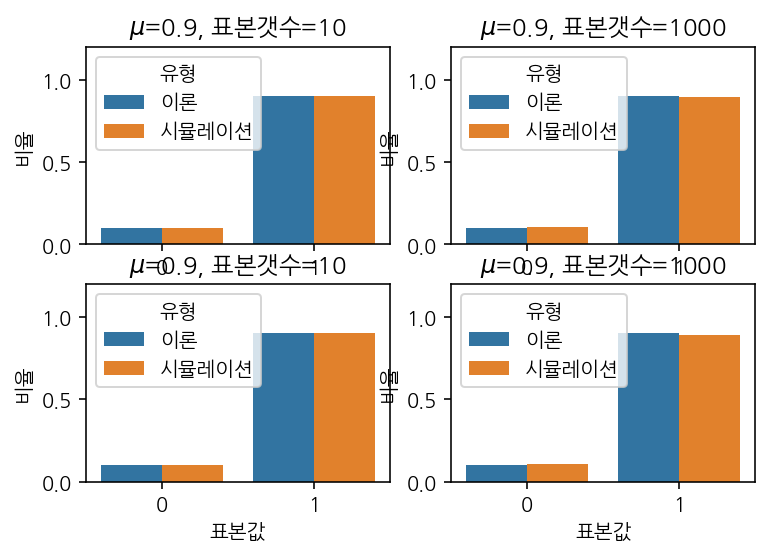

In [65]:
# m = 0.5, 표본개수 10
plt.subplot(221)
rv = sp.stats.bernoulli(mu)
x = rv.rvs(10, random_state=0)
y = np.bincount(x, minlength=2) / float(len(x))
xx = [0,1]
df = pd.DataFrame({"이론":rv.pmf(xx), "시뮬레이션":y})
df.index = [0,1]
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형","비율"]
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("$\mu$={}, 표본갯수={}".format(mu,10))
plt.ylim(0,1.2)

# m = 0.5, 표본개수 1000
plt.subplot(222)
rv = sp.stats.bernoulli(mu)
x = rv.rvs(1000, random_state=0)
y = np.bincount(x, minlength=2) / float(len(x))
xx = [0,1]
df = pd.DataFrame({"이론":rv.pmf(xx), "시뮬레이션":y})
df.index = [0,1]
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형","비율"]
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("$\mu$={}, 표본갯수={}".format(mu,1000))
plt.ylim(0,1.2)


# m = 0.9, 표본개수 10
mu=0.9
plt.subplot(223)
rv = sp.stats.bernoulli(mu)
x = rv.rvs(10, random_state=0)
y = np.bincount(x, minlength=2) / float(len(x))
xx = [0,1]
df = pd.DataFrame({"이론":rv.pmf(xx), "시뮬레이션":y})
df.index = [0,1]
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형","비율"]
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("$\mu$={}, 표본갯수={}".format(mu,10))
plt.ylim(0,1.2)

# m = 0.9, 표본개수 1000
plt.subplot(224)
rv = sp.stats.bernoulli(mu)
x = rv.rvs(1000, random_state=0)
y = np.bincount(x, minlength=2) / float(len(x))
xx = [0,1]
df = pd.DataFrame({"이론":rv.pmf(xx), "시뮬레이션":y})
df.index = [0,1]
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형","비율"]
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("$\mu$={}, 표본갯수={}".format(mu,1000))
plt.ylim(0,1.2)

#### 이항분포

### 사이파이를 사용한 이항분포의 시뮬레이션

In [66]:
N = 10
mu = 0.6
rv = sp.stats.binom(N,mu)

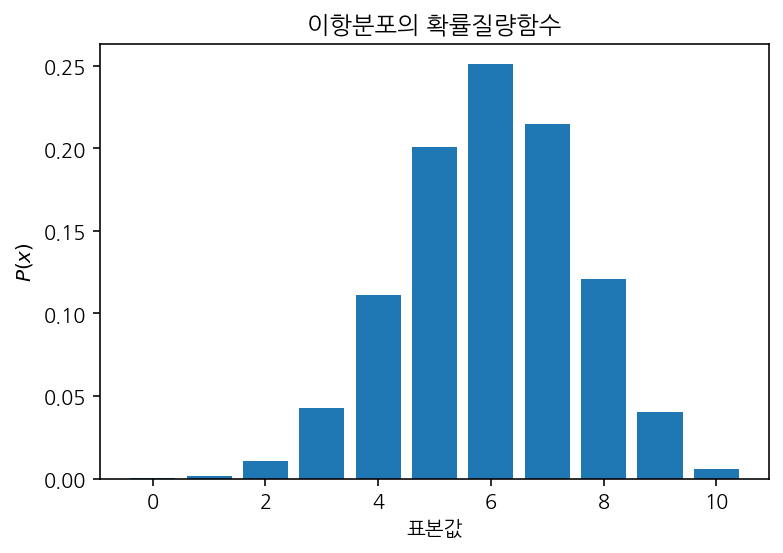

In [67]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

In [68]:
N = 10
mu = 0.9
rv = sp.stats.binom(N,mu)

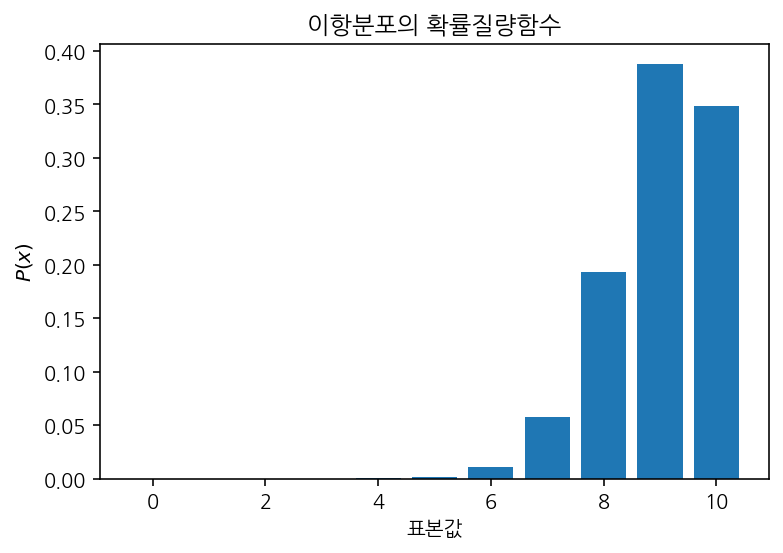

In [69]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()